<a href="https://colab.research.google.com/github/moizahmed813/CODSOFT/blob/main/Movie%20Rating%20Prediction%20with%20Python/MovieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Reading from the given datasets
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1')
ratings_df = pd.read_csv('ratings.dat', sep='::', engine='python', encoding='utf-8')
users_df = pd.read_csv('users.dat', sep='::', engine='python', encoding='utf-8')

In [ ]:
# Viewing information available in the datasets
print(movies_df.info())
print(ratings_df.info())
print(users_df.info())

In [ ]:
# Viewing the description in the datasets to gain better insights.
print(movies_df.describe())
print(ratings_df.describe())
print(users_df.describe())

In [ ]:
movies_df.columns = ['Movie_ID', 'Movie_Name', 'Genres']
movies_df.head()

,Movie_ID,Movie_Name,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [ ]:
ratings_df.columns = ['User_ID', 'Movie_ID', 'Rating', 'Time_Stamp']
ratings_df.head()

,User_ID,Movie_ID,Rating,Time_Stamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [ ]:
users_df.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip_Code']
users_df.head()

,User_ID,Gender,Age,Occupation,Zip_Code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


   User_ID Gender  Age  Occupation Zip_Code Age_Group
0        2      M   56          16    70072     50-59
1        3      M   25          15    55117     20-29
2        4      M   45           7    02460     40-49
3        5      M   25          20    55455     20-29
4        6      F   50           9    55117     50-59



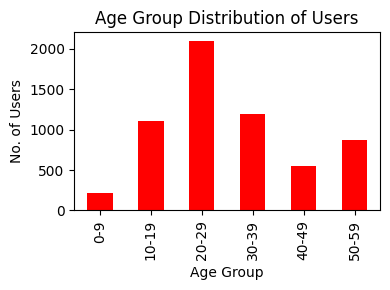

In [ ]:
# Creating user age groups
users_df['Age'] = users_df['Age'].astype(int)
def Age_Group(age):
    if age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    elif age < 80:
        return '70-79'
    else:
        return '80+'

# Creating a new "Age_Group" column
users_df['Age_Group'] = users_df['Age'].apply(Age_Group)
print(users_df.head())
print()

age_group_counts = users_df['Age_Group'].value_counts()

# Visualizing age groups of users
plt.figure(figsize=(4, 3))
age_group_counts.sort_index().plot(kind='bar', color='red')
plt.title('Age Group Distribution of Users')
plt.xlabel('Age Group')
plt.ylabel('No. of Users')
plt.tight_layout()
plt.show()


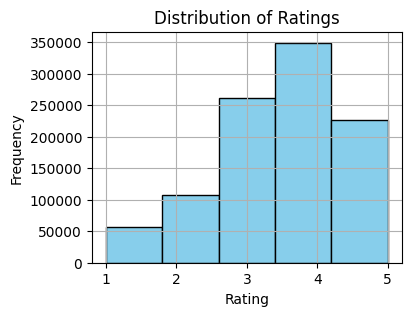

In [ ]:
# Visualizing ratings with respect to frequency
plt.figure(figsize=(4, 3))
plt.hist(ratings_df['Rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [ ]:
# Combining columns from all dataframes into one
df = pd.concat([movies_df, ratings_df ,users_df], axis=1)
df.head()

                       Movie_Name  Genres  Rating
93  In the Bleak Midwinter (1995)  Comedy       3



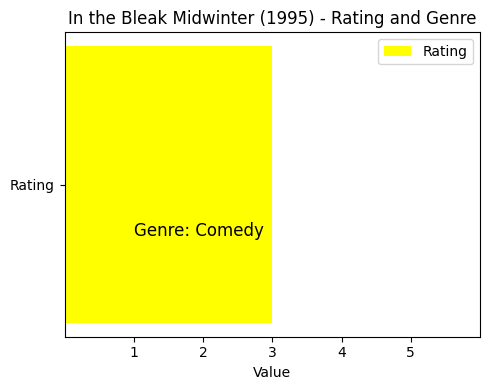

In [ ]:
# Visualizing and checking the rating for a movie i.e. In the Bleak Midwinter
m_name = 'In the Bleak Midwinter (1995)'
movie_data = df[df['Movie_Name'] == m_name]
rating_data = movie_data[['Movie_Name', 'Genres', 'Rating']]
print(rating_data)
print()

rating = rating_data['Rating'].iloc[0]
genre = rating_data['Genres'].iloc[0]
plt.figure(figsize=(5, 4))
plt.barh(['Rating'], [rating], color='yellow', label='Rating')
plt.title(f'{m_name} - Rating and Genre')
plt.xlabel('Value')
plt.legend()
plt.xticks(range(1, 6))
plt.xlim(0, 6)
plt.text(1, -0.15, f'Genre: {genre}', fontsize=12, color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Using one-hot encoding for Genres
genre_columns = df['Genres'].str.get_dummies('|')
df = pd.concat([df, genre_columns], axis=1)

HistGradientBoostingRegressor - MAE: 0.934, RMSE: 1.117



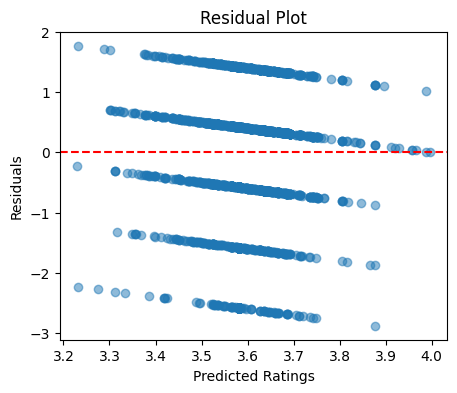

In [ ]:
# Using machine learning model i.e. Histogram Gradient Boosting Regressor for rating prediction
features = df[['Age', 'Occupation'] + list(genre_columns.columns)]
labels = df['Rating']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

models= [ HistGradientBoostingRegressor()]

for model in models:
    model.fit(train_features, train_labels)
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    rmse = np.sqrt(mse)
    print(f'{type(model).__name__} - MAE: {mae:.3f}, RMSE: {rmse:.3f}')
    print()

# Calculating residuals for Residual Plot visualization
residuals = test_labels - predictions
plt.figure(figsize=(5, 4))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residual Plot for Movie Rating Prediction')
plt.show()
